In [697]:
import pandas as pd
import numpy as np
import string
import math
import os
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
matplotlib.style.use('ggplot')
%matplotlib inline 


os.chdir('/Users/pawanshivhare/Desktop/fbprep/regression')
from subprocess import check_output
print(check_output(["ls", "../regression"]).decode("utf8"))

data_description.txt
sample_submission.csv
test.csv
train.csv



In [698]:
data=pd.read_csv('train.csv')
num_cols=data._get_numeric_data().columns.tolist()
cat_cols= list(set(data.columns.tolist()) - set(data._get_numeric_data().columns.tolist()))
print(data.shape)
print(num_cols)
print(cat_cols)

redun_num_cols=['Id','GarageCars','GarageYrBlt']
redun_cat_cols=[]

(1460, 81)
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['Electrical', 'Alley', 'RoofStyle', 'PavedDrive', 'Condition1', 'ExterQual', 'BsmtExposure', 'SaleCondition', 'GarageType', 'MiscFeature', 'LandContour', 'HouseStyle', 'Neighborhood', 'LotConfig', 'MSZoning', 'SaleType', 'Foundation', 'Heating', 'ExterCond', 'BldgType', 'BsmtFinType2', 'Functional', 'Exterior1st', 'HeatingQC', 'Exterior2nd', 'Fence', 'FireplaceQu', 'MasVnrType', 'BsmtQual', 'Condition2', 'Utilities', 'GarageFinish', 'LandSlope', 'BsmtCond', 'LotSh

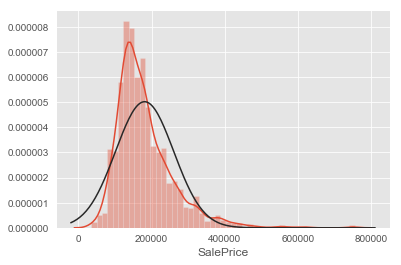

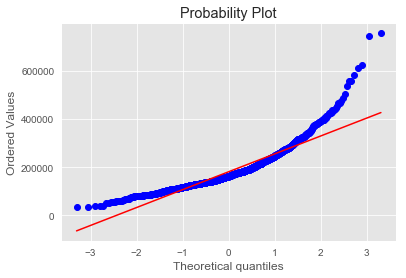

In [699]:
# data exploration
sns.distplot(data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

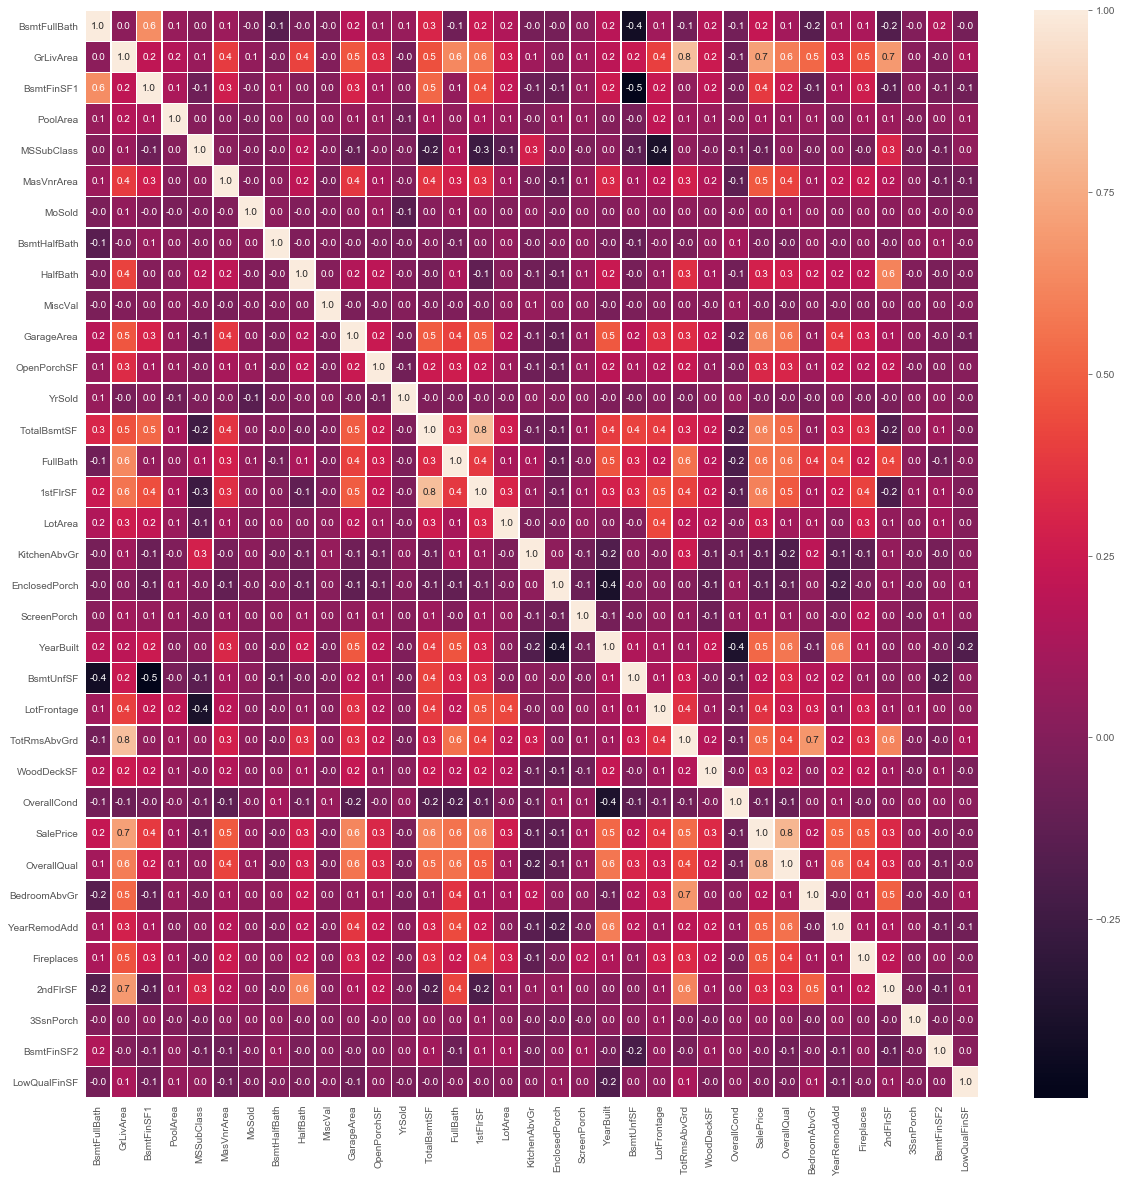

In [700]:
corrset=list(set(num_cols)-set(redun_num_cols))
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data[corrset].corr(),annot=True, linewidths=0.5, fmt='.1f',ax=ax)

In [701]:
th=0.4
impvars=data[corrset].corr()['SalePrice'].loc[(data[corrset].corr()['SalePrice'] > th) |
                                      (data[corrset].corr()['SalePrice'] < -1*th)].index.tolist()
print(impvars)

['GrLivArea', 'MasVnrArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', '1stFlrSF', 'YearBuilt', 'TotRmsAbvGrd', 'SalePrice', 'OverallQual', 'YearRemodAdd', 'Fireplaces']


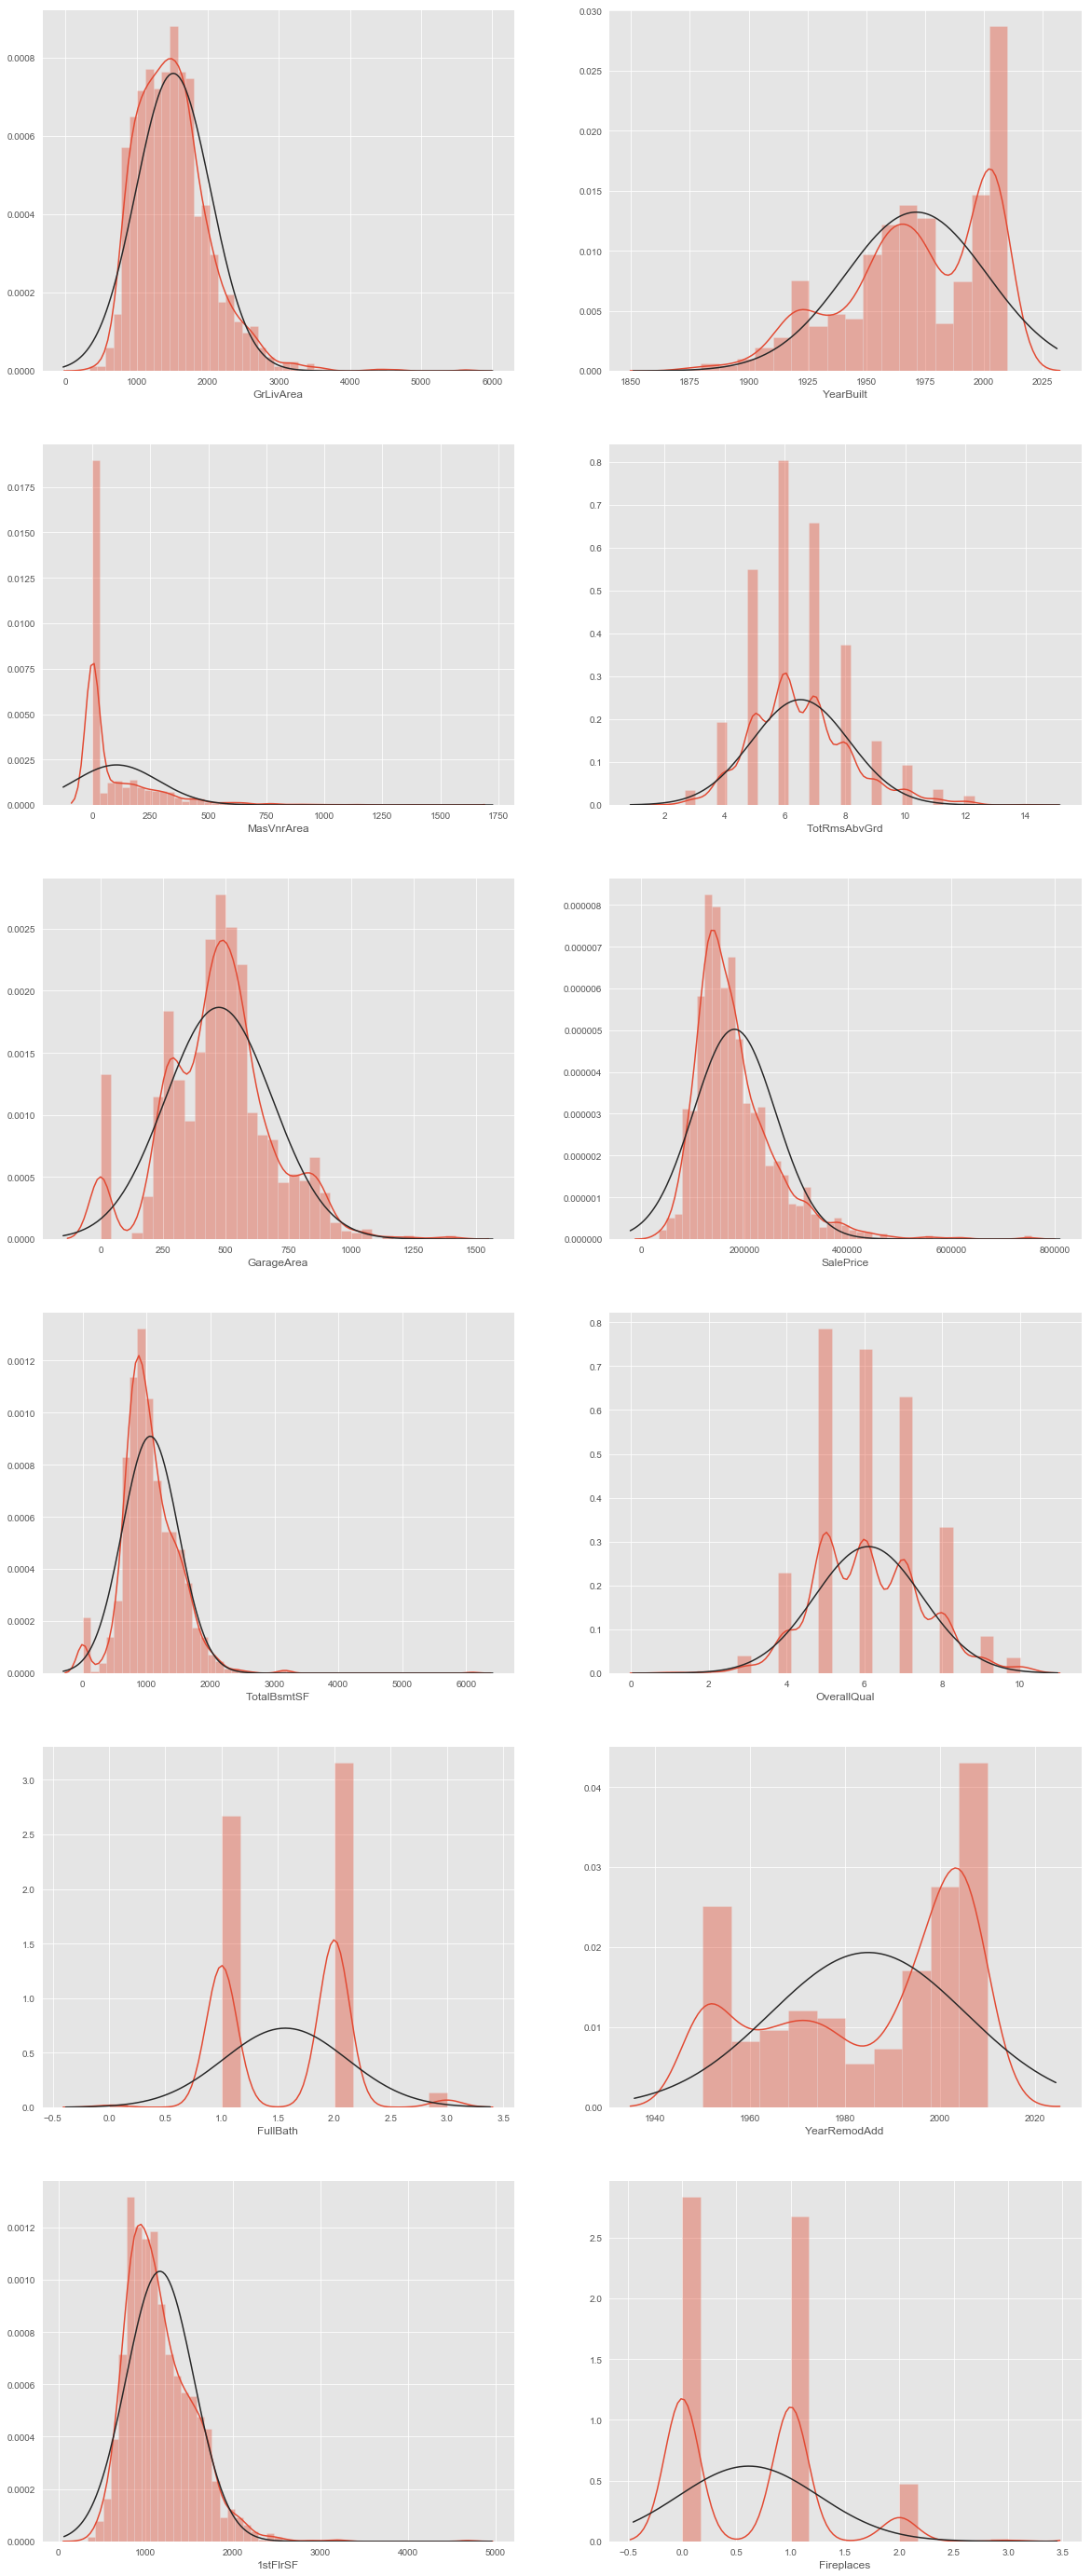

In [702]:
fig, axes =plt.subplots(figsize= (20,50), nrows = round(len(impvars)/2), ncols=2)
i=0
j=0
for item in impvars:
    sns.distplot(data[item].dropna(),fit=norm,ax=axes[i,j])
    if i == round(len(impvars)/2) -1:
        i=0
        j=1
    else:
        i=i+1

In [703]:
data[impvars].describe()

,GrLivArea,MasVnrArea,GarageArea,TotalBsmtSF,FullBath,1stFlrSF,YearBuilt,TotRmsAbvGrd,SalePrice,OverallQual,YearRemodAdd,Fireplaces
count,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,103.685262,472.980137,1057.429452,1.565068,1162.626712,1971.267808,6.517808,180921.195890,6.099315,1984.865753,0.613014
std,525.480383,181.066207,213.804841,438.705324,0.550916,386.587738,30.202904,1.625393,79442.502883,1.382997,20.645407,0.644666
min,334.000000,0.000000,0.000000,0.000000,0.000000,334.000000,1872.000000,2.000000,34900.000000,1.000000,1950.000000,0.000000
25%,1129.500000,0.000000,334.500000,795.750000,1.000000,882.000000,1954.000000,5.000000,129975.000000,5.000000,1967.000000,0.000000
50%,1464.000000,0.000000,480.000000,991.500000,2.000000,1087.000000,1973.000000,6.000000,163000.000000,6.000000,1994.000000,1.000000
75%,1776.750000,166.000000,576.000000,1298.250000,2.000000,1391.250000,2000.000000,7.000000,214000.000000,7.000000,2004.000000,1.000000
max,5642.000000,1600.000000,1418.000000,6110.000000,3.000000,4692.000000,2010.000000,14.000000,755000.000000,10.000000,2010.000000,3.000000


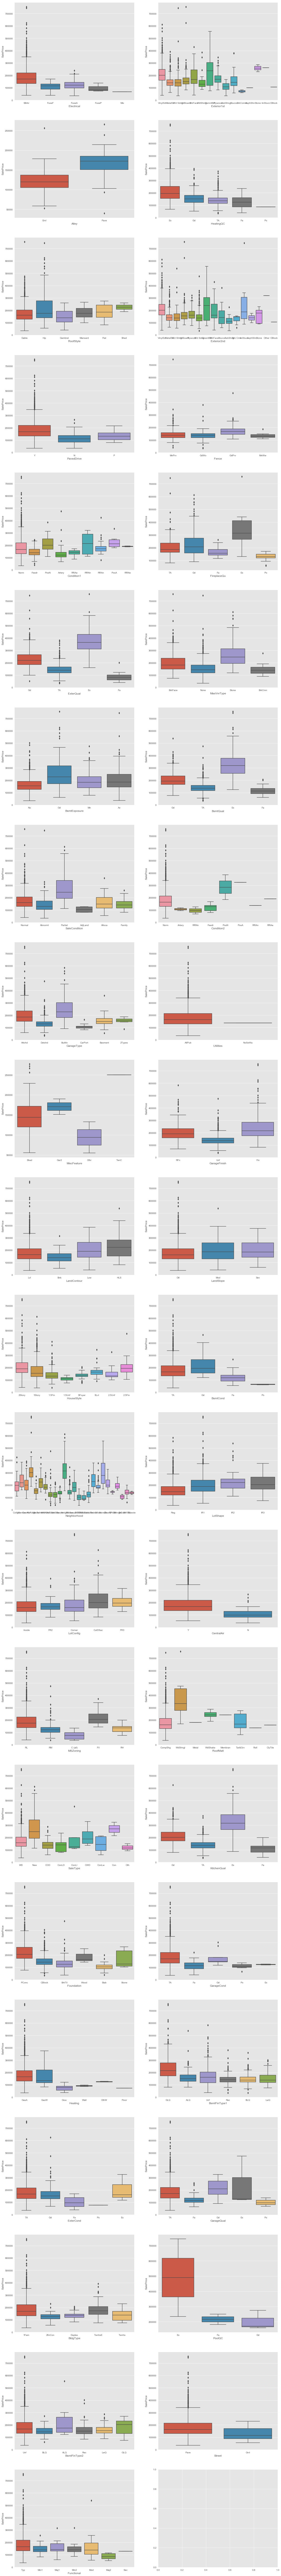

In [704]:
fig, axes =plt.subplots(figsize= (20,200), nrows = round(len(cat_cols)/2), ncols=2)
i=0
j=0
for item in cat_cols:
    sns.boxplot(x=data[item],y=data['SalePrice'],ax=axes[i,j])
    if i == round(len(cat_cols)/2) -1:
        i=0
        j=1
    else:
        i=i+1

In [705]:
#missing analysis
def missing(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
    miss=pd.concat([total,percent],axis=1,keys=['total','percent'])
    miss=miss[(miss['total']> 0)]
    return miss
print(missing(data[cat_cols]))
print(missing(data[impvars]))

              total   percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
GarageFinish     81  0.055479
GarageQual       81  0.055479
GarageType       81  0.055479
GarageCond       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtCond         37  0.025342
BsmtQual         37  0.025342
BsmtFinType1     37  0.025342
MasVnrType        8  0.005479
Electrical        1  0.000685
            total   percent
MasVnrArea      8  0.005479


In [706]:
# Analyzing missing values
print(data[(data['FireplaceQu'].isnull())]['Fireplaces'].sum())
print(data[(data['PoolQC'].isnull())]['PoolArea'].sum())

0
0


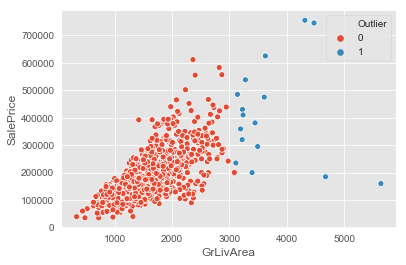

In [707]:
#Analyzing Outliers
def scale(var):
    scale=(var-var.mean())/var.std()
    outlier= ((scale > 3) | (scale < -3)).astype(int)
    return outlier
data['Outlier']=scale(data['GrLivArea'])
sns.scatterplot(x="GrLivArea", y="SalePrice", hue='Outlier', data=data)

In [708]:
# data transformation
data['MasVnrArea']=data['MasVnrArea'].fillna(0)
data['lnSalePrice']=np.log(data['SalePrice'] + 1)
data['lnGrLivArea']=np.log(data['GrLivArea'] + 1)
data['ln1stFlrSF']=np.log(data['1stFlrSF'] + 1)
data['lnMasVnrArea']=np.log(data['MasVnrArea'] + 1)
data['lnGarageArea']=np.log(data['GarageArea'] + 1)
data['lnTotalBsmtSF']=np.log(data['TotalBsmtSF'] + 1)
data['lnFireplaces']=np.log(data['Fireplaces'] + 1)
data['lnSalePrice']=np.log(data['SalePrice'] + 1)
data['age']= np.log(2020 - data['YearBuilt'] +1)
data['remodage']= np.log(2020 - data['YearRemodAdd'] +1)

def dummy(df,var,pre):
    dummies=pd.get_dummies(df[var],prefix=pre)
    df=pd.concat([df,dummies],axis=1)
    return df

for item in cat_cols:
    data=dummy(data,item,item)

In [709]:
data=data.drop(data[data.TotalBsmtSF > 3000].index)
data=data.drop(data[data.SalePrice > 500000].index)
data=data.drop(data[data.GrLivArea > 4000].index)
data.shape

(1447, 343)

In [710]:
exclu=['Outlier']
label=['lnSalePrice']
features=list(set(data.columns.tolist())-set(num_cols)-set(cat_cols)-set(exclu)-set(label)) + ['FullBath', 'TotRmsAbvGrd','OverallQual']

In [711]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(data[features]), np.array(data[label])
                                                    , test_size=0.3, random_state=57)

In [712]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

lr = LinearRegression()
model=lr.fit(X_train,y_train)

In [713]:
print("Train: MAE is %f" % mean_absolute_error(y_train, model.predict(X_train)))
print("Train: MSE is %f" % np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
print("Train: R2 is %f" % r2_score(y_train, model.predict(X_train)))

Train: MAE is 0.068528
Train: MSE is 0.095565
Train: R2 is 0.939682


In [714]:
print("test: MAE is %f" % mean_absolute_error(y_test, model.predict(X_test)))
print("test: MSE is %f" % np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print("test: R2 is %f" % r2_score(y_test, model.predict(X_test)))

test: MAE is 1581645046.570156
test: MSE is 12900923884.335663
test: R2 is -1149216110110460346368.000000


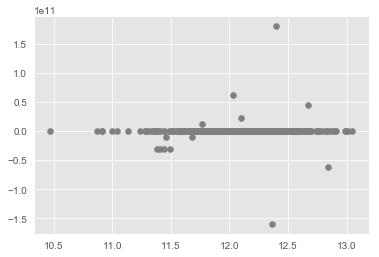

In [715]:
plt.scatter(y_test,  model.predict(X_test),  color='gray')
plt.show()

In [747]:
from sklearn.linear_model import Ridge

ls = Ridge(alpha=100)
model=ls.fit(X_train,y_train)

In [748]:
print("Train: MAE is %f" % mean_absolute_error(y_train, model.predict(X_train)))
print("Train: MSE is %f" % np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
print("Train: R2 is %f" % r2_score(y_train, model.predict(X_train)))

Train: MAE is 0.094736
Train: MSE is 0.130320
Train: R2 is 0.887833


In [749]:
print("test: MAE is %f" % mean_absolute_error(y_test, model.predict(X_test)))
print("test: MSE is %f" % np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print("test: R2 is %f" % r2_score(y_test, model.predict(X_test)))

test: MAE is 0.099283
test: MSE is 0.132077
test: R2 is 0.879548


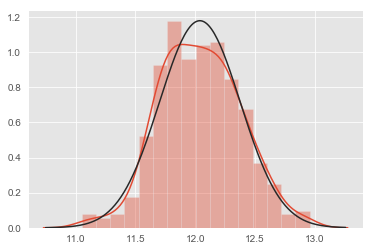

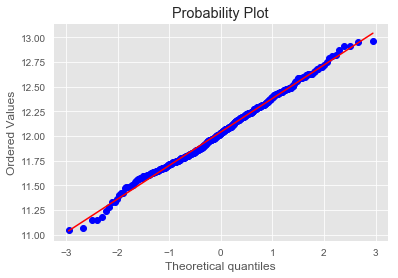

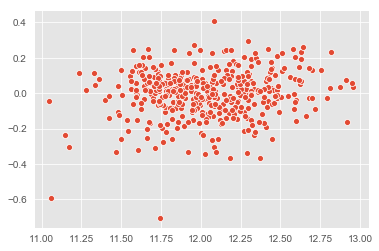

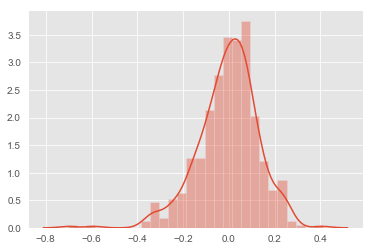

In [760]:
sns.distplot(model.predict(X_test), fit=norm);
fig = plt.figure()
res = stats.probplot(model.predict(X_test).flatten(), plot=plt)
fig = plt.figure()
sns.scatterplot(x=model.predict(X_test).flatten(),y=(y_test.flatten()-model.predict(X_test).flatten()))
fig = plt.figure()
sns.distplot((y_test.flatten()-model.predict(X_test).flatten()))

In [536]:
from sklearn.metrics import SCORERS

SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])